# Практическая работа №3
### Выполнил студент группы БВТ2102 Маширин Федор Сергеевич

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.savetxt('data.txt', np.random.randint(0, 101, size=(100, 11)), fmt='%d')
data = np.loadtxt('data.txt')
print(data)

[[  0.  72.  86. ...  87.  59.  17.]
 [ 52.  57.  85. ...  28.  57.  52.]
 [  9.  27.  48. ...  76.   7.  38.]
 ...
 [ 19.  87. 100. ...  56.  93.  14.]
 [ 13.  36.  75. ...  17.  98.  56.]
 [ 17.  13.  44. ...  64.  50.  57.]]


In [84]:
np.savetxt('data.txt', data, fmt='%d')

#### Задача 1
Дано множество из p матриц (n,n) и множество из p векторов (n,1). Написать функцию для рассчета суммы p произведений матриц (результат имеет размерность (n,1)).

In [5]:
def sum_matrix_x_vector(matrices, vectors):
  if len(matrices) == len(vectors):
    result = np.zeros((matrices[0].shape[0], 1))
    for matrix, vector in zip(matrices, vectors):
      result += np.dot(matrix, vector)

    return result

In [10]:
def sum_matrix_x_vector(matrix_vector_pairs):
    result = np.zeros((matrix_vector_pairs[0][0].shape[0], 1))
    for matrix, vector in matrix_vector_pairs:
        result += np.dot(matrix, vector)
    return result

data_split = np.split(data, 10)
matrix_vector_pairs = [(block[:, :-1], block[:, -1].reshape(-1, 1)) for block in data_split]

result = sum_matrix_x_vector(matrix_vector_pairs)
print(result)


[[251555.]
 [261818.]
 [228330.]
 [256170.]
 [267149.]
 [264532.]
 [234774.]
 [259729.]
 [244837.]
 [214881.]]


#### Задача 2
Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений.


In [18]:
def binary_matrix(vector):
  max_val = int(np.max(vector))
  num_bits = max_val.bit_length()

  matrix = np.array([list(np.binary_repr(val, width=num_bits)) for val in vector], dtype=int)

  return matrix
vector = data[0].astype(int)
res = binary_matrix(vector)
print(res)

[[0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0]
 [1 0 1 0 1 1 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1]
 [0 1 0 0 1 0 0]
 [0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0]
 [1 0 1 0 1 1 1]
 [0 1 1 1 0 1 1]
 [0 0 1 0 0 0 1]]


#### Задача 3
Написать функцию, которая возвращает все уникальные строки матрицы.



In [ ]:
def unique_rows(data):
  unique_values = np.unique(data, axis=0)
  return unique_values

copydata = data.copy()
res = unique_rows(copydata)
print(res)

[[ 0. 72. 86. ... 87. 59. 17.]
 [ 1. 66. 29. ...  8. 19. 45.]
 [ 2. 96. 12. ... 32. 80. 41.]
 ...
 [95. 56. 99. ... 74. 93.  7.]
 [96. 31. 98. ... 46. 15.  6.]
 [97. 73.  2. ... 24. 31. 73.]]


#### Задача 4
Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки гистограмму значений (использовать функцию hist из модуля matplotlib.plot).


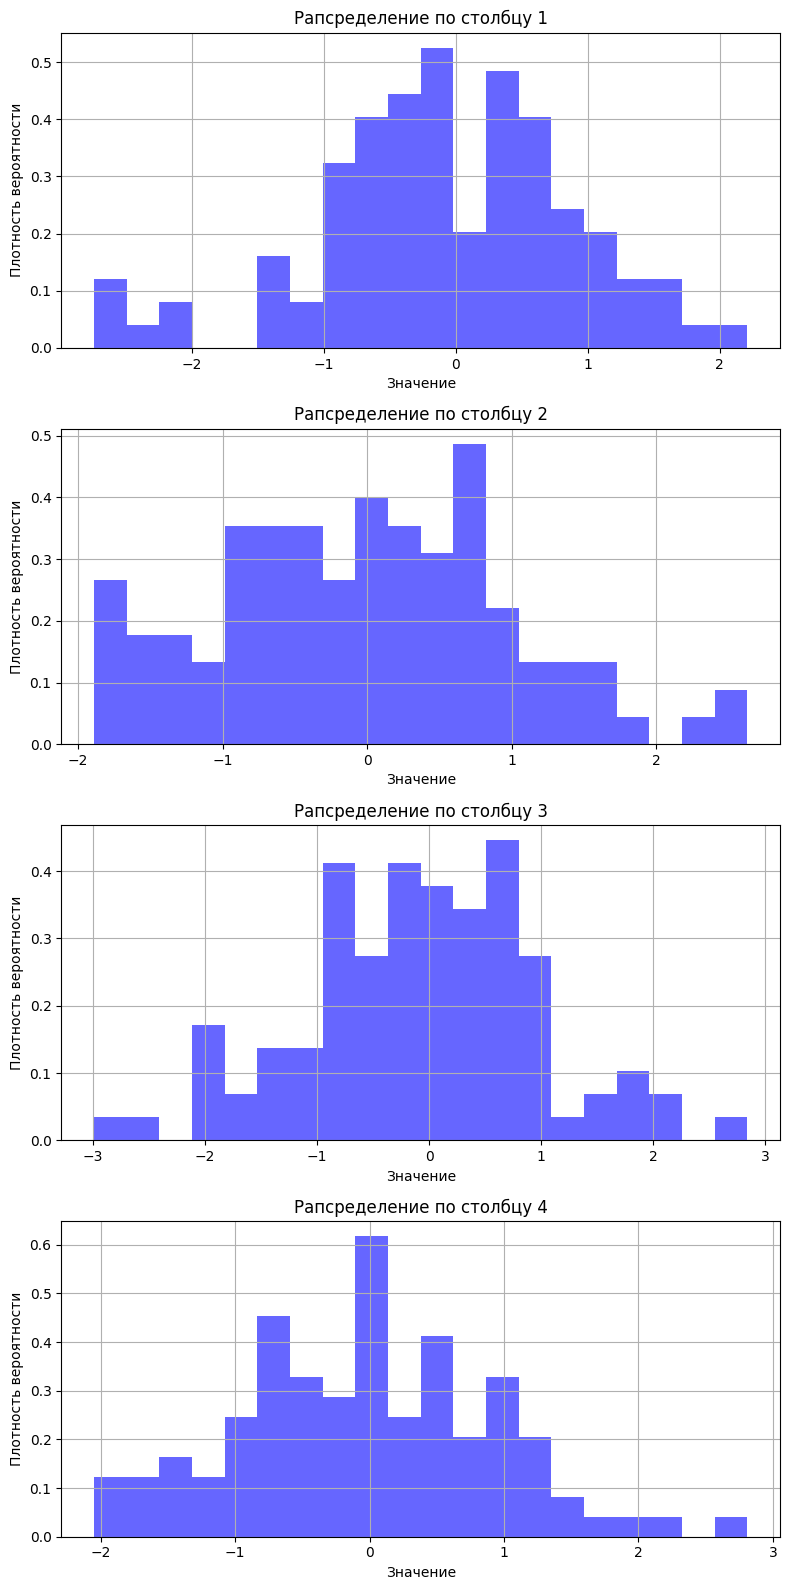

Мат. ожидание: [-6.37500000e-01 -5.82500000e-01  3.85000000e-01  3.75000000e-02
  8.75000000e-02 -6.82500000e-01  4.65000000e-01  9.57500000e-01
  3.70000000e-01  4.80000000e-01 -3.12500000e-01 -7.15000000e-01
  5.50000000e-02  5.02500000e-01 -2.22500000e-01 -2.20000000e-01
  5.72500000e-01  2.52500000e-01  2.15000000e-01 -2.10000000e-01
  5.82500000e-01  6.87500000e-01  4.15000000e-01 -4.52500000e-01
  5.20000000e-01 -7.65000000e-01 -2.35000000e-01  1.15000000e-01
 -9.15000000e-01  5.57500000e-01 -5.27500000e-01 -6.05000000e-01
  2.60000000e-01  4.37500000e-01  7.65000000e-01 -1.08000000e+00
 -2.10000000e-01 -2.75000000e-01  2.62500000e-01 -1.09500000e+00
 -7.82500000e-01  2.50000000e-02 -1.22750000e+00 -8.27500000e-01
  2.25000000e-02 -3.27500000e-01  5.35000000e-01  4.85000000e-01
 -4.02500000e-01  8.10000000e-01  5.75000000e-02  3.75000000e-02
 -8.50000000e-01  8.50000000e-02  3.57500000e-01 -3.05000000e-01
 -7.70000000e-01  2.35000000e-01 -5.35000000e-01  1.97500000e-01
 -4.750000

In [40]:
def fill_matrix_normal(m, n, mean=0, std=1):
    data = np.random.normal(loc=mean, scale=std, size=(m, n))
    data = np.round(data, decimals=2)

    means = np.mean(data, axis=0)
    variances = np.var(data, axis=0)

    fig, axes = plt.subplots(m, 1, figsize=(8, 4 * m))
    for i in range(m):
        axes[i].hist(data[i], bins=20, density=True, alpha=0.6, color='b', label='Гистограмма')
        axes[i].set_title(f"Рапсределение по столбцу {i + 1}")
        axes[i].set_xlabel("Значение")
        axes[i].set_ylabel("Плотность вероятности")
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

    return means, variances

means, variances = fill_matrix_normal(4, 100, mean=0, std=1)
print(f"Мат. ожидание: {means} \nДисперсия: {variances}")


#### Задача 5
Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b.



In [47]:
def fill_chess_matrix(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix


In [48]:
matrix = fill_chess_matrix(4, 6, 0, 8)
print(matrix)


[[0 8 0 8 0 8]
 [8 0 8 0 8 0]
 [0 8 0 8 0 8]
 [8 0 8 0 8 0]]


#### Задача 6
Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне.

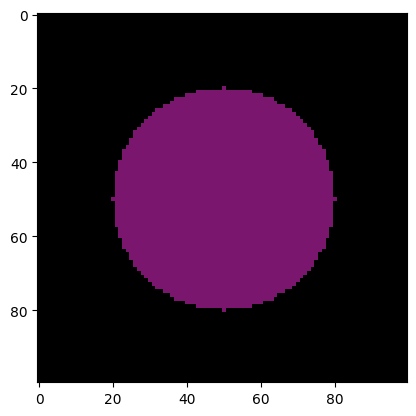

In [55]:
def create_circle_image(radius, color, size=(100, 100)):
    height, width = size
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    center_x = width // 2
    center_y = height // 2
    
    for x in range(width):
        for y in range(height):
            if ((x - center_x) ** 2 + (y - center_y) ** 2) ** 0.5 <= radius:
                image[y, x] = color
    
    return image

circle_image = create_circle_image(radius=30, color=(123, 22, 111), size=(100, 100))

plt.imshow(circle_image)
plt.show()


#### Задача 7
Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО).

In [56]:
def std_tensor(tensor):
  mean = np.mean(tensor)
  std = np.std(tensor)

  tensor_std = (tensor - mean) / std

  return tensor_std

In [57]:
tensor_std = std_tensor(circle_image)
print(tensor_std)

[[[-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  ...
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]]

 [[-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  ...
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]]

 [[-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  ...
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]]

 ...

 [[-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  ...
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]
  [-0.53203155 -0.53203155 -0.53203155]]

 [

#### Задача 8
Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо).

In [82]:
def submatrix_with_center(matrix, center, size, fill=0):
    row_center, col_center = center
    row_start = max(0, row_center - size // 2)
    row_end = min(matrix.shape[0], row_center + size // 2 + 1)
    col_start = max(0, col_center - size // 2)
    col_end = min(matrix.shape[1], col_center + size // 2 + 1)
    
    submatrix = np.full((size, size), fill)
    submatrix[max(0, size // 2 - row_center):size - max(0, row_center + size // 2 - matrix.shape[0]),
              max(0, size // 2 - col_center):size - max(0, col_center + size // 2 - matrix.shape[1])] = \
        matrix[row_start:row_end, col_start:col_end]
    
    return submatrix


In [83]:
center = (1, 1)
size = 5

res8 = submatrix_with_center(data, center, size, fill=0)
print(res8)

[[ 0  0  0  0  0]
 [ 0  0 72 86  0]
 [ 0 52 57 85 14]
 [ 0  9 27 48  0]
 [ 0 48 25 84 38]]


#### Задача 9
Написать функцию, которая находит самое часто встречающееся число в каждой строке матрицы и возвращает массив этих значений.

In [85]:
def common_values_in_rows(matrix):
  values = []

  for row in matrix:
    unique_elements, counts = np.unique(row, return_counts=True)
    max_count_index = np.argmax(counts)
    values.append(unique_elements[max_count_index])

  return np.array(values)

In [86]:
res9 = common_values_in_rows(data)
print(res9)

[  0.  52.   0.   0.  33.   9.  22.   1.  74.   3.  29.   0.  87.  30.
   9.  60.  16.   3.   0.   1.   9.  70.  19.  20.   5.   9.  25.   6.
  67. 100.   9.   0.   1.   2.  80.  17.   9.   6.  29.   4.  29.  75.
   0.  33.  22.  28.  24.   2.  50.  89.  35.   7.  45.   4.   9.  74.
   1.  77.  59.   6.   0.  85.  84.   0.  22.  12.  87.   3.  35.   2.
  58.  43.  21.   2.   7.   9.  10.  35.   2.  13.   0.   0.   8.   9.
  57.  84.   2.  10.   1.  29. 100.   6.  18.  73.  64.  89.   4.  14.
  17.  13.]


#### Задача 10
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width).

In [93]:
def sum_channels_weghts(img, weights):
  if img.shape[2] != weights.shape[0]:
    raise ValueError("Количество весов должно совпадать с числом каналов изображения.")

  weighted_img = img * weights[np.newaxis, np.newaxis, :]

  result = np.sum(weighted_img, axis=2)

  return result

In [94]:
height, width, numChannels = 6, 6, 3
image = np.random.randint(0, 256, (height, width, numChannels))
weights = np.array([0.4, 0.7, 0.2])

res10 = sum_channels_weghts(image, weights)
print(res10)

[[203.9 168.6  55.9  88.9  58.9 149.4]
 [208.5  97.3 195.5 137.2  64.2 223.2]
 [209.3 180.2 148.3 241.2 300.4 158.9]
 [203.3 181.9 127.7 233.6 177.1 157.9]
 [114.9 276.4 187.7 125.7 156.1 109.1]
 [121.3 179.  242.6 195.4 238.9 142.3]]
